In [1]:
import json
import numpy as np
import pandas as pd

from pandas.io.json import json_normalize
from scipy.stats import zscore
from scipy.spatial.distance import cdist
import collections

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
x = pd.read_csv("filled_ibge.csv", index_col='City')

In [3]:
x = (x / 1000)
x = x.apply(zscore)

In [4]:
x.head(5)

,fundamental_schools,fundamental_teachers,PIB,Área da unidade territorial,Esgotamento sanitário adequado,Matrículas no ensino fundamental,population_last_census,medium_schools,Matrículas no ensino médio,medium_teachers,...,IDEB,IDHM,Urbanização de vias públicas,average_salary,demographic_density,estabelecimento_sus,estimated_population,occupied_people,occupied_population,receitas_fontes_externas
City,,,,,,,,,,,,,,,,,,,,,
ACEGUA,-0.340544,-0.253081,0.910735,1.112925,1.246101,-0.223142,-0.226647,-0.255608,-0.233676,-0.275142,...,-0.303590,-0.640952,-0.565253,0.601557,-0.265370,-0.344377,-0.223750,-0.149830,-0.068246,0.546833
AGUA SANTA,-0.383425,-0.271108,1.900073,-0.275100,0.589631,-0.245006,-0.235522,-0.255608,-0.258679,-0.256970,...,0.005452,0.886316,-0.436994,0.601557,-0.234040,-0.272525,-0.237506,-0.156662,-0.271035,0.188832
AGUDO,-0.083256,-0.086326,-0.424627,-0.007241,0.731866,-0.099477,-0.063836,-0.129582,-0.110002,-0.111596,...,0.159973,-0.471256,0.215456,-0.424035,-0.175833,-0.056969,-0.078526,-0.093692,-0.218134,-0.586836
AJURICABA,-0.211900,-0.192238,0.096246,-0.240761,-1.117189,-0.215057,-0.188863,-0.255608,-0.243052,-0.232741,...,0.623537,0.959043,-0.570829,-0.424035,-0.203468,-0.272525,-0.196301,-0.138663,-0.174049,0.775555
ALECRIM,-0.254781,-0.255334,-0.893976,-0.247549,-1.244836,-0.228267,-0.191636,-0.255608,-0.237248,-0.275142,...,0.778059,-1.004587,-1.178667,-0.424035,-0.203658,-0.056969,-0.208576,-0.157070,-0.976387,-0.000113


In [5]:
distortions = []
K = range(1, 20)
for k in K:
    model = KMeans(n_clusters=k, max_iter=2000).fit(x)
    distortions.append(sum(np.min(cdist(x, model.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

In [6]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

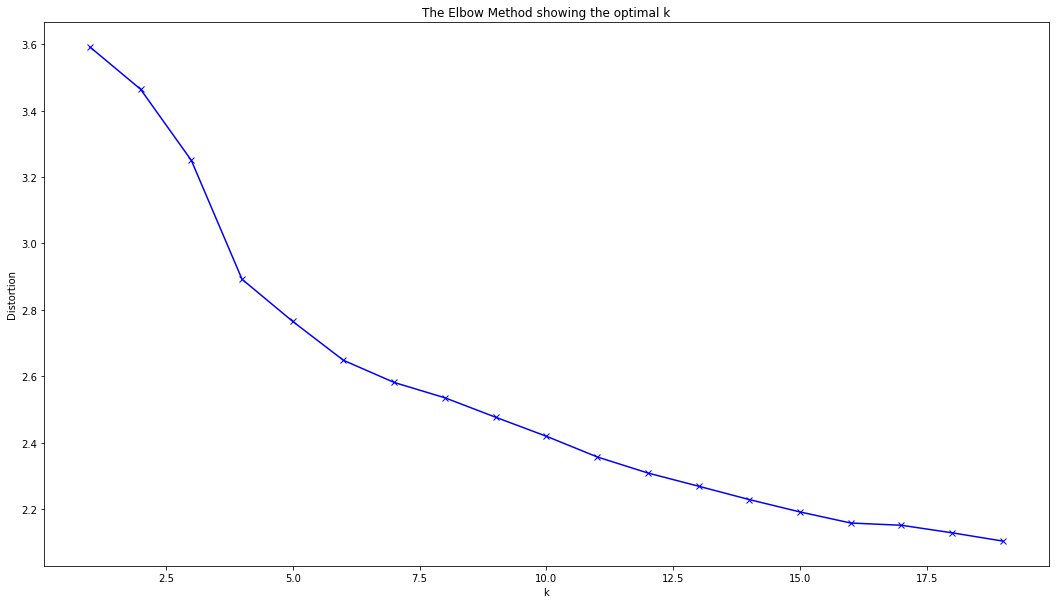

In [7]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [8]:
model_15_centroids = KMeans(n_clusters=15, max_iter=2000).fit(x)
result_15_centroids = model_15_centroids.predict(x)
counter_15_centroids = collections.Counter(result_15_centroids)
print(counter_15_centroids)

Counter({8: 78, 0: 75, 4: 63, 9: 48, 10: 43, 3: 41, 14: 34, 13: 31, 5: 31, 11: 27, 12: 9, 2: 8, 7: 6, 1: 1, 6: 1})


In [9]:
model_16_centroids = KMeans(n_clusters=16, max_iter=2000).fit(x)
result_16_centroids = model_16_centroids.predict(x)
counter_16_centroids = collections.Counter(result_16_centroids)
print(counter_16_centroids)

Counter({11: 81, 3: 51, 6: 50, 10: 49, 1: 47, 2: 42, 12: 37, 14: 34, 4: 33, 9: 25, 0: 16, 15: 12, 8: 8, 7: 6, 13: 4, 5: 1})


In [10]:
model_17_centroids = KMeans(n_clusters=17, max_iter=2000).fit(x)
result_17_centroids = model_17_centroids.predict(x)
counter_17_centroids = collections.Counter(result_17_centroids)
print(counter_17_centroids)

Counter({3: 79, 8: 62, 10: 55, 5: 41, 11: 41, 0: 37, 14: 36, 9: 34, 4: 31, 6: 29, 13: 23, 12: 9, 2: 8, 7: 6, 15: 3, 1: 1, 16: 1})


In [11]:
result = pd.DataFrame(result_15_centroids)
result.columns = ['Label']
frames = [pd.Series(x.index.values), result]
final = pd.concat(frames, axis=1)
final.to_csv("clustering_ibge_data.csv", index=False)
final.to_json(r'clustering_ibge_data.json')